# Initial exploration of earthquake data

Session: M044_2024_12_04_09_30

In [131]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import os
from tqdm.auto import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pyaldata as pyal
import xarray as xr

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
# TODO: add example data to the repo and run on that
data_dir = r"C:\data\raw\M044\M044_2024_12_04_09_30"
fname = os.path.join(data_dir, "M044_2024_12_04_09_30_pyaldata.mat")

In [10]:
# load TrialData .mat file into a DataFrame
df = pyal.mat2dataframe(fname, shift_idx_fields=True)

field values_before_camera_trigger could not be converted to int.
field idx_before_camera_trigger could not be converted to int.
array field scwm_KSLabel could not be converted to int.
array field ccb_KSLabel could not be converted to int.
array field CP_KSLabel could not be converted to int.
array field MOp_KSLabel could not be converted to int.


In [11]:
df.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,scwm_spikes,ccb_chan_best,ccb_KSLabel,ccb_spikes,CP_chan_best,CP_KSLabel,CP_spikes,MOp_chan_best,MOp_KSLabel,MOp_spikes
0,M044,M044_2024_12_04_09_30,0,free,60001,0.01,-1,59999,[],1.0,...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...","[48, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52, 5...","[good, good, good, mua, good, mua, mua, mua, g...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[mua, good, good, mua, good, good, good, good,...","[[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
1,M044,M044_2024_12_04_09_30,1,intertrial,101,0.01,59999,60099,[],[],...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[48, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52, 5...","[good, good, good, mua, good, mua, mua, mua, g...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[mua, good, good, mua, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,..."
2,M044,M044_2024_12_04_09_30,2,trial,401,0.01,60099,60499,[],[],...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,...","[48, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52, 5...","[good, good, good, mua, good, mua, mua, mua, g...","[[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[mua, good, good, mua, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
3,M044,M044_2024_12_04_09_30,3,intertrial,101,0.01,60499,60599,[],[],...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...","[48, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52, 5...","[good, good, good, mua, good, mua, mua, mua, g...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[mua, good, good, mua, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,..."
4,M044,M044_2024_12_04_09_30,4,trial,401,0.01,60599,60999,[],[],...,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[48, 48, 49, 49, 50, 50, 51, 51, 51, 52, 52, 5...","[good, good, good, mua, good, mua, mua, mua, g...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[0, 0, 0, 1, 1, 1, 2, 3, 3, 3, 3, 3, 5, 5, 5, ...","[mua, good, good, mua, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,..."


## Preprocessing

In [184]:
time_signals = ['CP_spikes', 'MOp_spikes']
for signal in time_signals:
    df_ = pyal.remove_low_firing_neurons(df, signal, 1)  # Remove low firing (below 1 Hz) spikes from each spike trace 

C:\Users\MartinEsparzaINBRAIN\AppData\Local\pypoetry\Cache\virtualenvs\earthquake-analysis-dAG31IpV-py3.12\Lib\site-packages\pyaldata\firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(
C:\Users\MartinEsparzaINBRAIN\AppData\Local\pypoetry\Cache\virtualenvs\earthquake-analysis-dAG31IpV-py3.12\Lib\site-packages\pyaldata\firing_rates.py:108: UserWarning: Assuming spikes are actually spikes and dividing by bin size.
  utils.warnings.warn(


In [186]:
df_ = pyal.merge_signals(df_, time_signals, 'MOp_CP_spikes')
df_.MOp_CP_spikes[0].shape

(60001, 442)

In [187]:
df_ = pyal.select_trials(df_, "trial_name == 'trial'")  # Remove baseline
df_ = pyal.select_trials(df_, "idx_trial_end > 90000")  # Remove first 5 minutes because the switch was off
df_ = pyal.select_trials(df_, "idx_trial_end > 90000")  # Remove first 5 minutes because the switch was off

In [188]:
df_.head().idx_trial_end

0    91099
1    91599
2    92299
3    93199
4    93699
Name: idx_trial_end, dtype: int64

In [189]:
BIN_SIZE = 0.03
df_ = pyal.combine_time_bins(df_, int(BIN_SIZE/.01))  # Pass it to times bins of 0.03

In [191]:
print("original: ", df.MOp_spikes[2].shape)
print("combined: ", df_.MOp_CP_spikes[0].shape)

original:  (401, 578)
combined:  (133, 442)


### Why sqrt the data?
Data from a poisson process have heteroscedasticity --> Unequal variance across different firing rates. The square root transformation stabilizes the variance because the variance of a Poisson process becomes approximately constant after applying this transformation. This makes the data more suitable for statistical analyses that assume homoscedasticity.

In [192]:
time_signals = [signal for signal in pyal.get_time_varying_fields(df_) if 'spikes' in signal]
for signal in time_signals:
    df_ = pyal.sqrt_transform_signal(df_, signal)

In [193]:
df_ = pyal.add_firing_rates(df_, 'smooth', std=0.05)

In [194]:
df_.head()

,animal,session,trial_id,trial_name,trial_length,bin_size,idx_trial_start,idx_trial_end,idx_CPI,values_before_camera_trigger,...,CP_spikes,MOp_chan_best,MOp_KSLabel,MOp_spikes,MOp_CP_spikes,scwm_rates,ccb_rates,CP_rates,MOp_rates,MOp_CP_rates
0,M044,M044_2024_12_04_09_30,82,trial,401,0.03,30233,30366,[],[],...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.00031967516, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.21239205, 0....","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.034771092, 0.0, 0.0, 0.0, 23.380...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."
1,M044,M044_2024_12_04_09_30,84,trial,401,0.03,30399,30533,[],[],...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[6.201384, 6.201384, 2.798774, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 2.798774, 0.0, 3.0111659, 0.0...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9141243...","[[1.1265163, 0.0, 0.0, 16.662374, 0.0, 9.03492...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.9141243..."
2,M044,M044_2024_12_04_09_30,86,trial,401,0.03,30633,30766,[],[],...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.91412437, 0.0, 2.833545, 0....","[[2.8027468, 25.524176, 0.0, 0.0, 0.0, 0.0, 0....","[[0.0, 0.0, 10.460135, 8.7700815, 0.0, 0.03477...","[[2.8027468, 25.524176, 0.0, 0.0, 0.0, 0.0, 0...."
3,M044,M044_2024_12_04_09_30,88,trial,401,0.03,30933,31066,[],[],...,"[[0.0, 1.4142135623730951, 0.0, 0.0, 0.0, 0.0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 1.4142135623730951, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.00031967516, 0.0,...","[[0.0, 18.313324, 0.034771092, 0.0, 0.0, 0.0, ...","[[0.0, 0.0, 3.712898, 0.0, 0.21239205, 0.0, 0....","[[0.0, 18.313324, 0.034771092, 0.0, 0.0, 0.0, ..."
4,M044,M044_2024_12_04_09_30,90,trial,401,0.03,31099,31233,[],[],...,"[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[66, 66, 66, 66, 66, 66, 66, 66, 66, 66, 67, 6...","[good, mua, mua, good, good, good, good, good,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[0.0, 0.0, 0.0, 0.91412437, 0.0, 0.0, 32.1682...","[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,..."


## Plotting

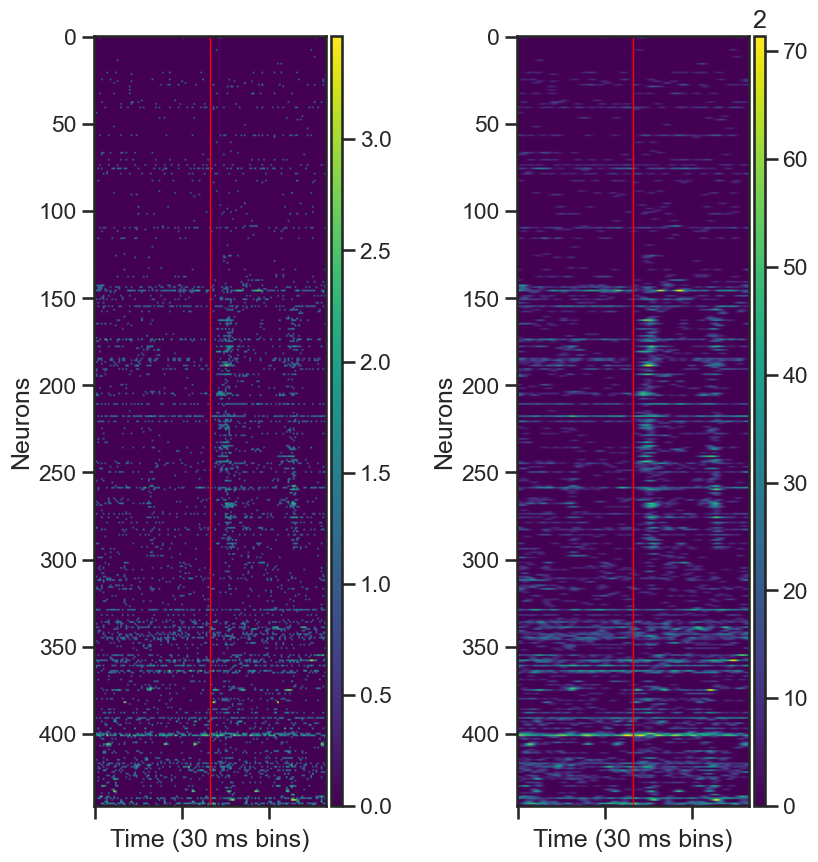

In [223]:
trial = 80
area = 'MOp_CP_spikes'
from mpl_toolkits.axes_grid1 import make_axes_locatable
with plt.style.context('seaborn-v0_8-bright'):
    sns.set_theme(context='talk', style='ticks', font='Arial')
    fig, ax = plt.subplots(1, 2, sharex='all', figsize=(10, 10))
    im1 = ax[0].imshow(df_.MOp_CP_spikes[trial].T, cmap='viridis')
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im1, cax=cax)
    
    im2 = ax[1].imshow(df_.MOp_CP_rates[trial].T, cmap='viridis')
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    plt.colorbar(im2, cax=cax)
    for ax_ in ax:
        plt.title(f"{df_.loc[trial].values_Sol_direction}")
        ax_.axvline(x = df_.loc[trial].idx_sol_on, color='red', linewidth = '1')
        ax_.set_ylabel('Neurons')
        ax_.set_xlabel('Time (30 ms bins)')
        ax_.set_xticklabels([])

In [214]:
df_.loc[trial]

animal                                                                       M044
session                                                     M044_2024_12_04_09_30
trial_id                                                                      108
trial_name                                                                  trial
trial_length                                                                  401
bin_size                                                                     0.03
idx_trial_start                                                             33933
idx_trial_end                                                               34066
idx_CPI                                                                        []
values_before_camera_trigger                                                   []
idx_before_camera_trigger                                                      []
idx_motion                                              [3, 17, 50, 85, 101, 123]
values_Sol_direc